

1.  Thresholding
  *   Trial and Error
  *   Otsu Method

2.   Watershed Segmentation

3. HSV Color Segmentation
4. Clustering-Based Segmentation Algorithms


---







1. Thresholding - Trial and Error

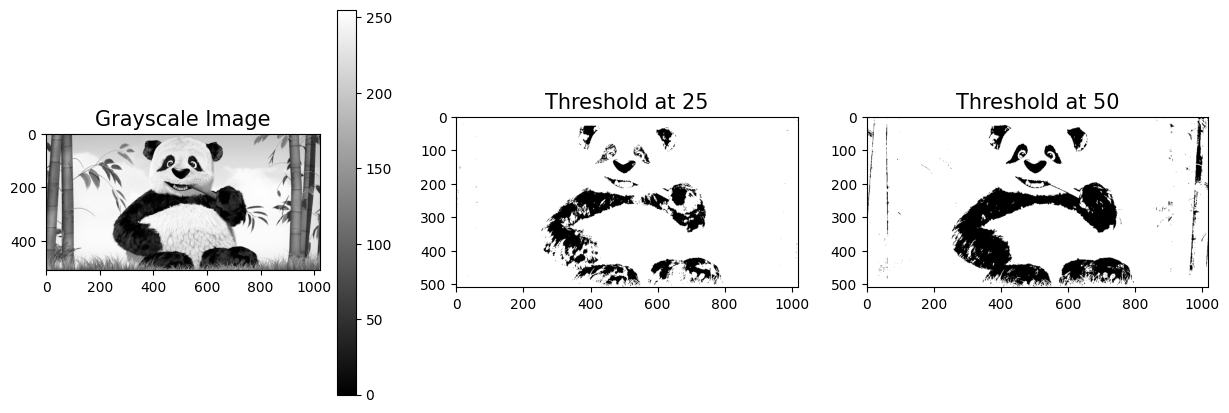

In [44]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

# The path to image file
image_path = '/content/panda.jpg'

# Load the image
input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if input_image is not None:
    sample_g = input_image
    # Experimented threshold values
    sample_t = sample_g > 25
    sample_t1 = sample_g > 50

    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    im = ax[0].imshow(sample_g, cmap='gray')
    fig.colorbar(im, ax=ax[0])
    ax[1].imshow(sample_t, cmap='gray')
    ax[0].set_title('Grayscale Image', fontsize=15)
    ax[1].set_title('Threshold at 25', fontsize=15)
    ax[2].imshow(sample_t1, cmap='gray')
    ax[2].set_title('Threshold at 50', fontsize=15)
    plt.show()
else:
    print("Failed to load the image.")

2. Thresholding - Otsu’s Method

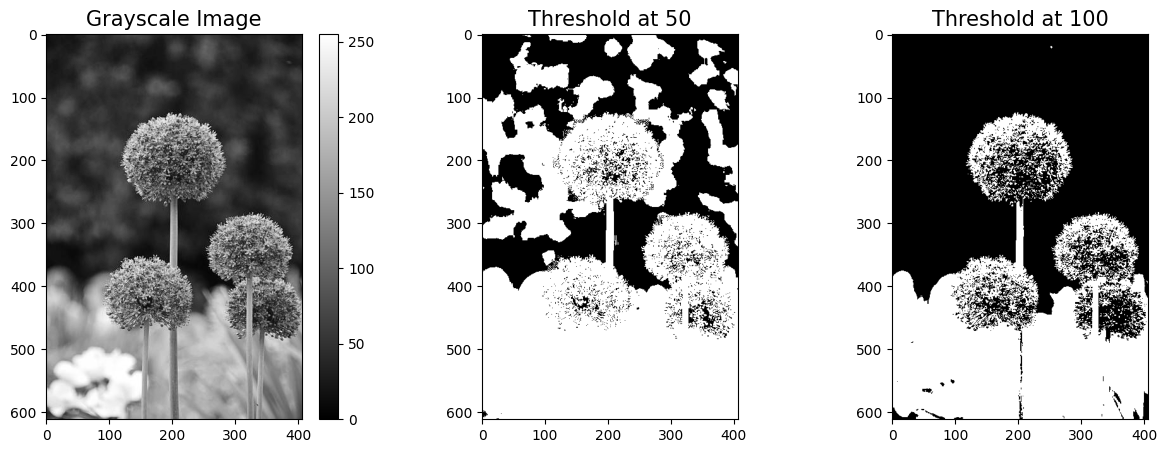

In [45]:
import cv2

image_path = '/content/flower.jpeg'
# Load the image using OpenCV
input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if input_image is not None:
    sample_g = input_image

    # Experimented threshold values
    sample_t = sample_g > 50
    sample_t1 = sample_g > 100

    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    im = ax[0].imshow(sample_g, cmap='gray')
    fig.colorbar(im, ax=ax[0])
    ax[1].imshow(sample_t, cmap='gray')
    ax[0].set_title('Grayscale Image', fontsize=15)
    ax[1].set_title('Threshold at 50', fontsize=15)
    ax[2].imshow(sample_t1, cmap='gray')
    ax[2].set_title('Threshold at 100', fontsize=15)
    plt.show()
else:
    print("Failed to load the image.")

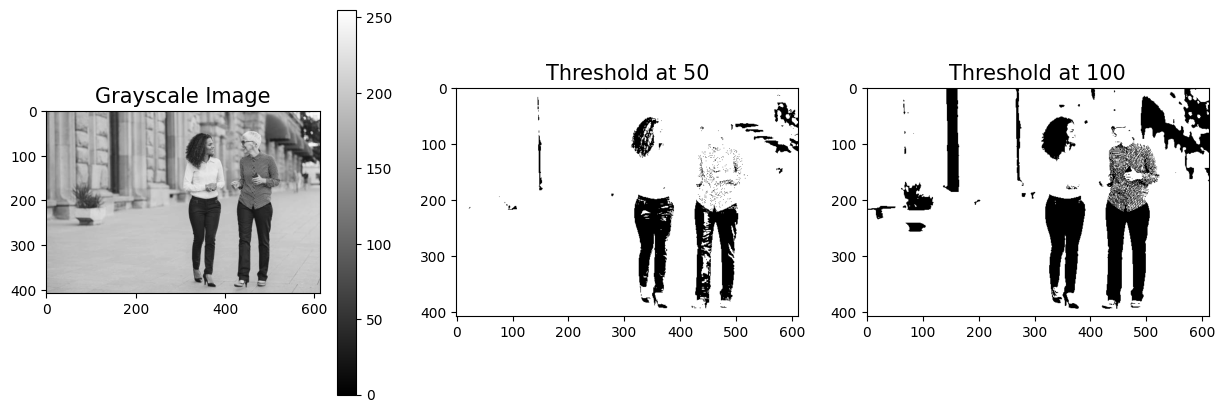

In [46]:
import cv2

image_path = '/content/street.jpg'

# Load the image using OpenCV
input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if input_image is not None:
    sample_g = input_image

    # Experimented threshold values
    sample_t = sample_g > 50
    sample_t1 = sample_g > 100

    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    im = ax[0].imshow(sample_g, cmap='gray')
    fig.colorbar(im, ax=ax[0])
    ax[1].imshow(sample_t, cmap='gray')
    ax[0].set_title('Grayscale Image', fontsize=15)
    ax[1].set_title('Threshold at 50', fontsize=15)
    ax[2].imshow(sample_t1, cmap='gray')
    ax[2].set_title('Threshold at 100', fontsize=15)
    plt.show()
else:
    print("Failed to load the image.")

1. Thresholding Segmentation - Otsu Method

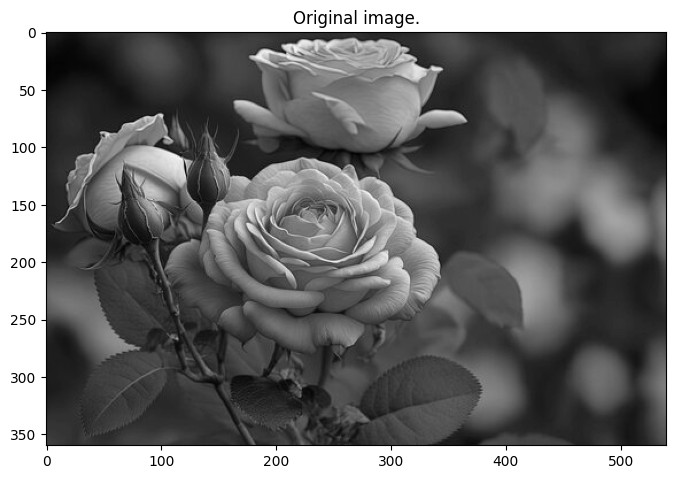

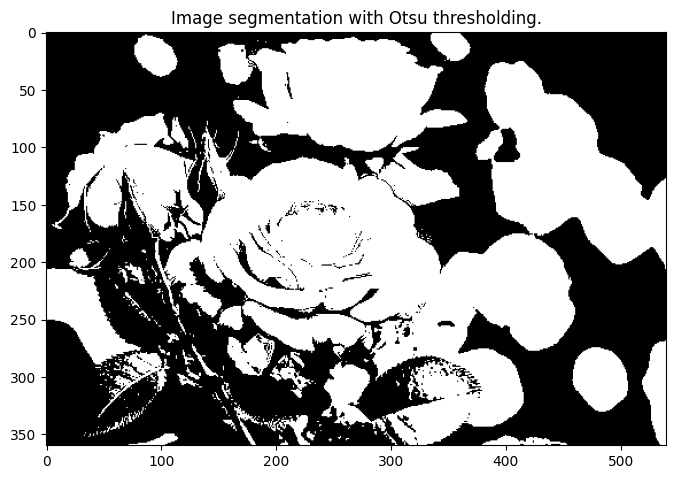

In [47]:
# Load the image
image = cv2.imread("/content/rose.jpg", cv2.IMREAD_GRAYSCALE)

# Create figures with a specific size
plt.figure(1, figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title("Original image.")

# Calculate the histogram and thresholds using OpenCV
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist = hist.flatten()
total_pixels = image.shape[0] * image.shape[1]

# Calculate cumulative sum and cumulative mean
cumsum = np.cumsum(hist)
cummean = cumsum / total_pixels

# Calculate between-class variance
variance = (cummean * (1 - cummean))
max_variance = np.max(variance)
optimal_threshold = np.argmax(variance)

# Apply the optimal threshold to perform Otsu's thresholding
otsu = (image > optimal_threshold).astype(np.uint8) * 255

# Create a figure for the segmented image
plt.figure(2, figsize=(8, 6))
plt.imshow(otsu, cmap='gray')
plt.title("Image segmentation with Otsu thresholding.")

plt.show()


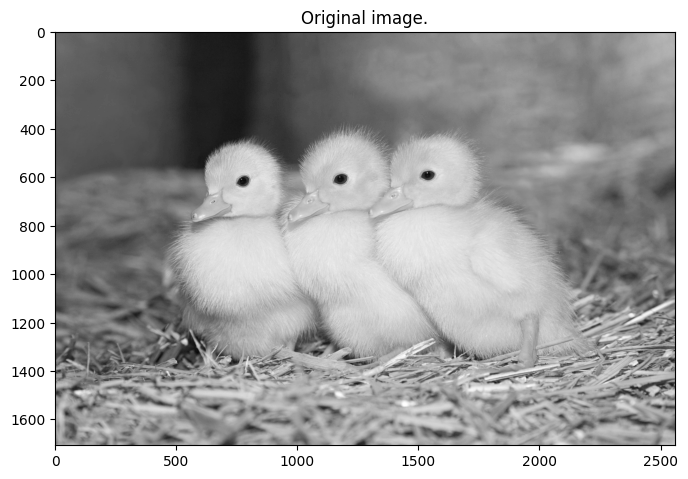

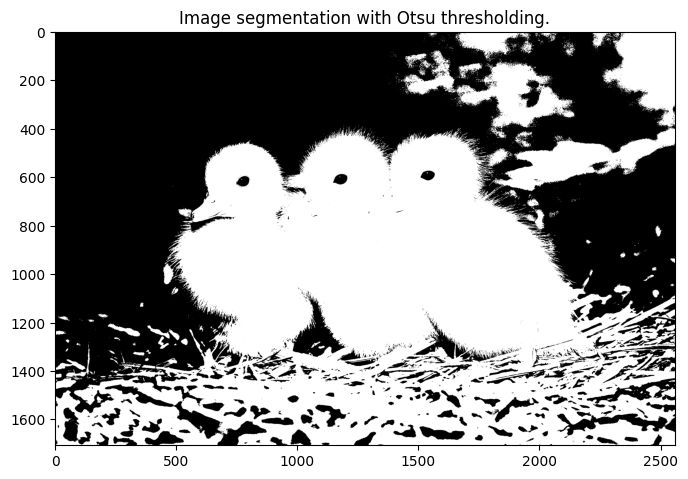

In [48]:
# Load the image
image = cv2.imread("/content/chick.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(1, figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title("Original image.")

# Calculate the histogram and thresholds using OpenCV
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist = hist.flatten()
total_pixels = image.shape[0] * image.shape[1]

# Calculate cumulative sum and cumulative mean
cumsum = np.cumsum(hist)
cummean = cumsum / total_pixels

# Calculate between-class variance
variance = (cummean * (1 - cummean))
max_variance = np.max(variance)
optimal_threshold = np.argmax(variance)

# Apply the optimal threshold to perform Otsu's thresholding
otsu = (image > optimal_threshold).astype(np.uint8) * 255

# Create a figure for the segmented image
plt.figure(2, figsize=(8, 6))
plt.imshow(otsu, cmap='gray')
plt.title("Image segmentation with Otsu thresholding.")

plt.show()


2.  Watershed Segmentation

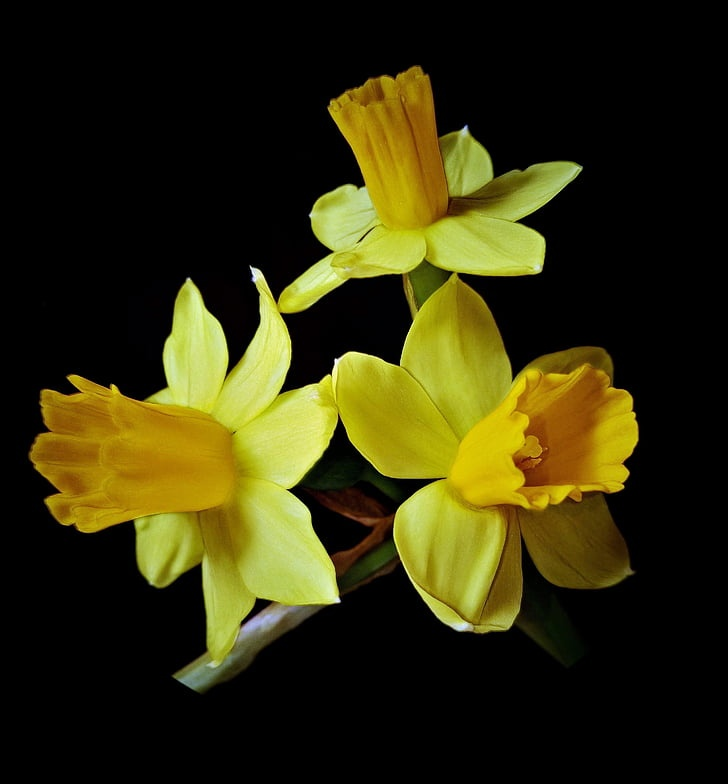

In [49]:
# Plot the image
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

#Image loading
img = cv2.imread("/content/yellow_black.jpg")

#image grayscale conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Show image
imshow(img)

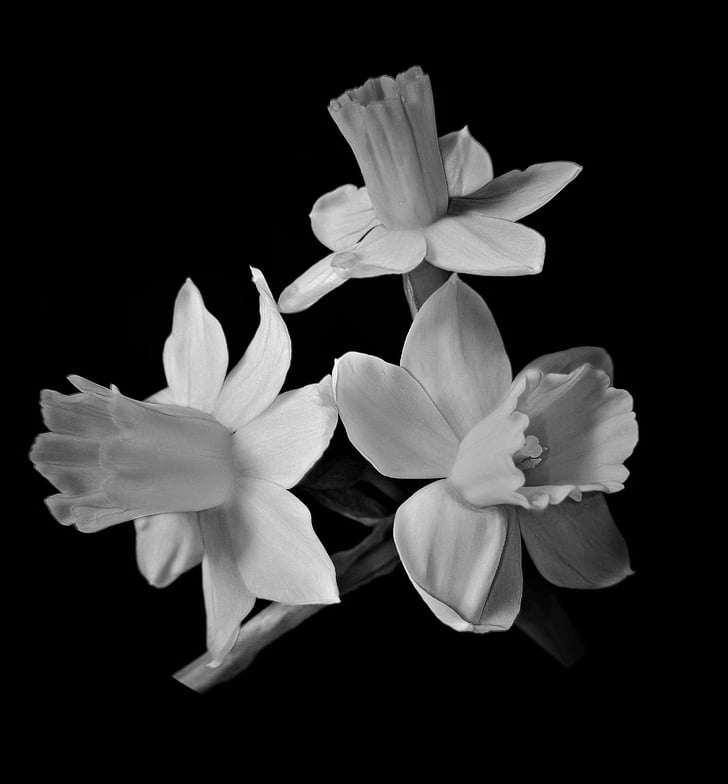

In [50]:
imshow(gray)

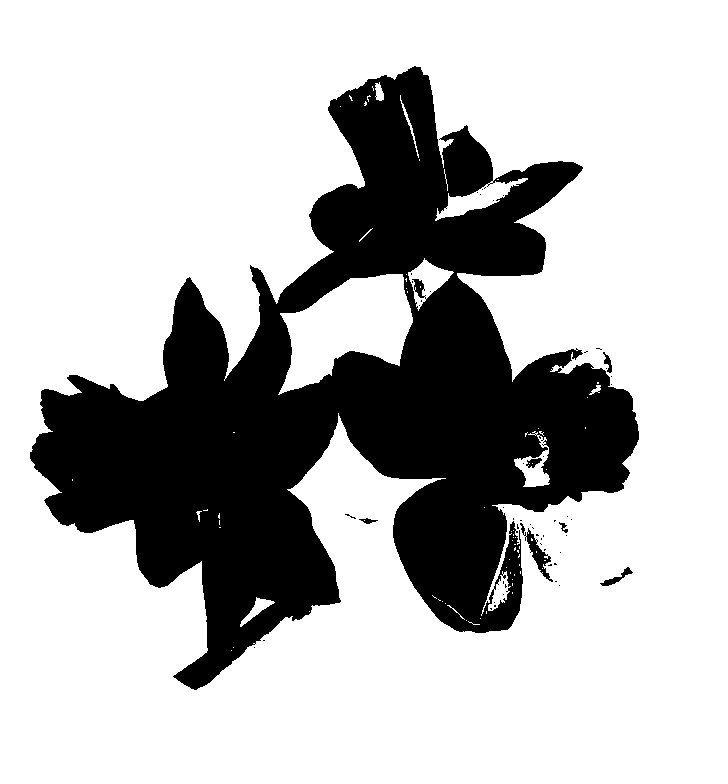

In [51]:
#Threshold Processing
ret, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow(bin_img)

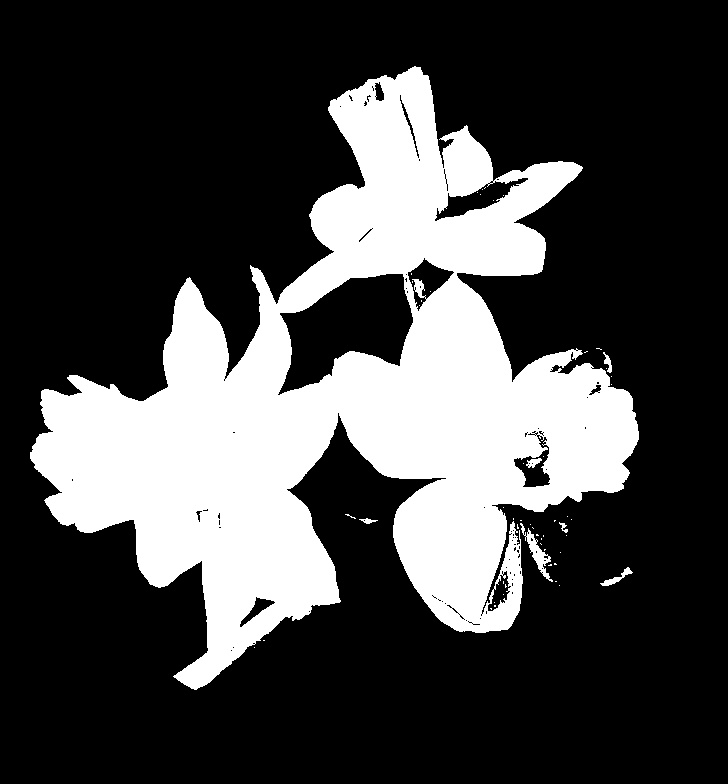

In [52]:
# Invert the binary image
inverted_bin_img = cv2.bitwise_not(bin_img)

# Display the inverted binary image
imshow(inverted_bin_img)

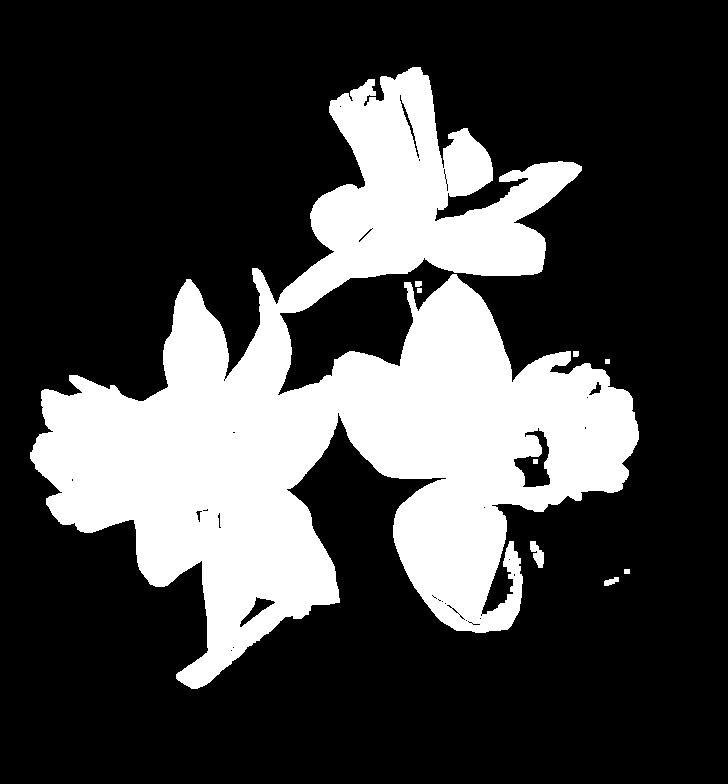

In [53]:
# noise removal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(inverted_bin_img, cv2.MORPH_OPEN, kernel, iterations=2)
imshow(bin_img)

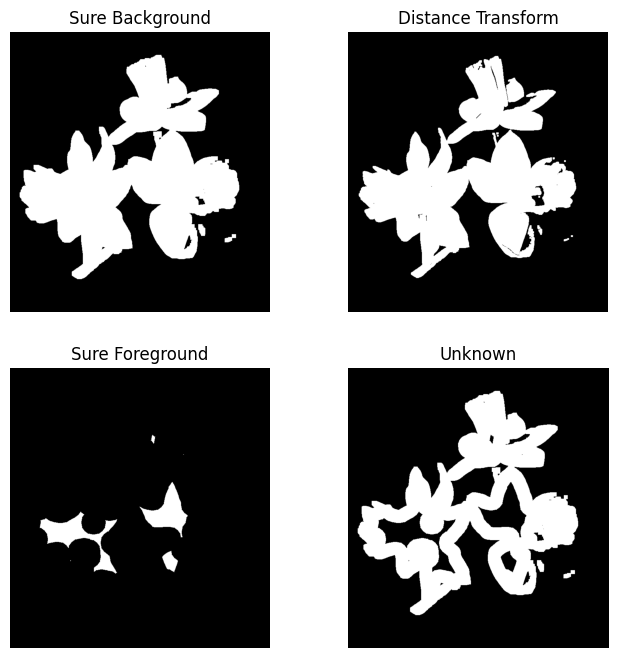

In [54]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
imshow(sure_bg, axes[0,0])
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
imshow(dist, axes[0,1])
axes[0, 1].set_title('Distance Transform')

#foreground area
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
imshow(sure_fg, axes[1,0])
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
imshow(unknown, axes[1,1])
axes[1, 1].set_title('Unknown')

plt.show()

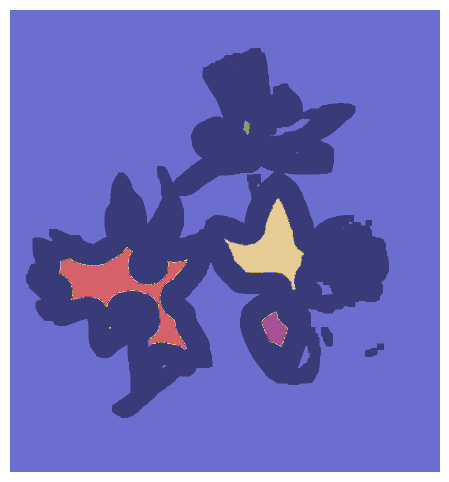

In [55]:
# Marker labelling
# sure foreground
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

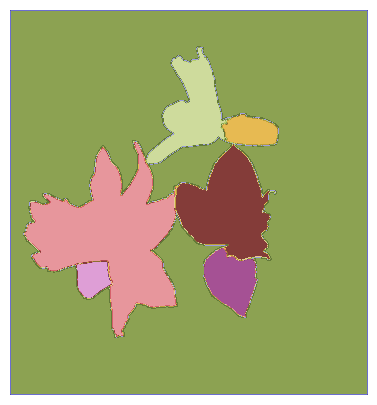

In [56]:
# watershed Algorithm
markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

coins = []
for label in labels[2:]:

# Create a binary image in which only the area of the label is in the foreground
#and the rest of the image is in the background
    target = np.where(markers == label, 255, 0).astype(np.uint8)

  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])

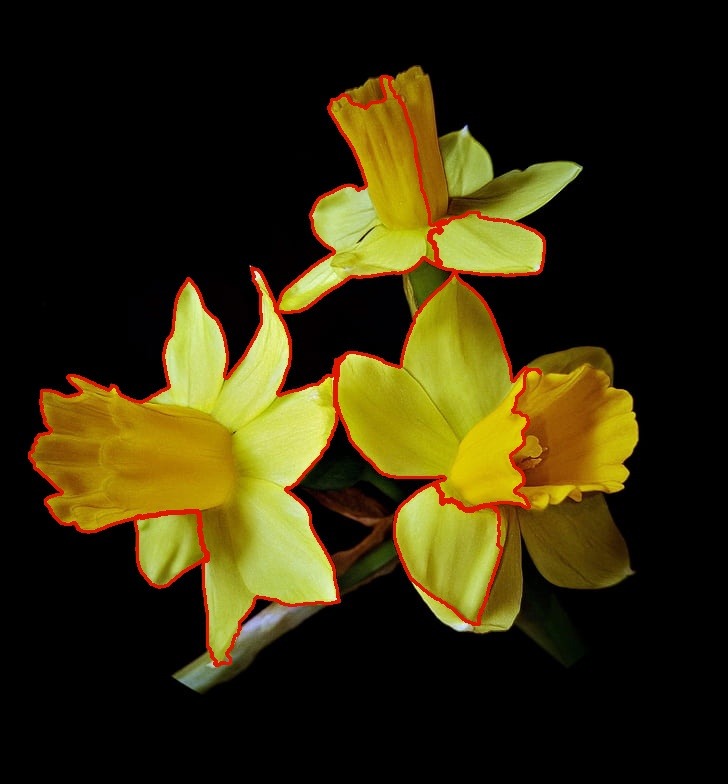

In [57]:
# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
imshow(img)

3. HSV Color Segmentation

In [58]:
import cv2
import numpy as np
from skimage.color import rgb2hsv

# Load the grayscale image using OpenCV
image_path = '/content/daisy.jpg'
sample = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the grayscale image to a fake RGB image
fake_rgb = cv2.cvtColor(sample, cv2.COLOR_GRAY2BGR)

# Now, you can convert the fake RGB image to HSV
sample_h = cv2.cvtColor(fake_rgb, cv2.COLOR_BGR2HSV)

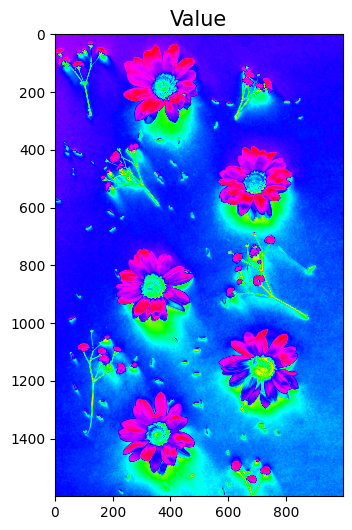

In [59]:
import matplotlib.pyplot as plt

# Assuming 'sample_h' contains your HSV image
fig, ax = plt.subplots(figsize=(6, 6))  # You can adjust the width and height as needed
ax.imshow(sample_h[:, :, 2], cmap='hsv')  # Display only the Value channel
ax.set_title('Value', fontsize=15)
plt.show()


4. Clustering-Based Segmentation Algorithm - K-Means Clustering

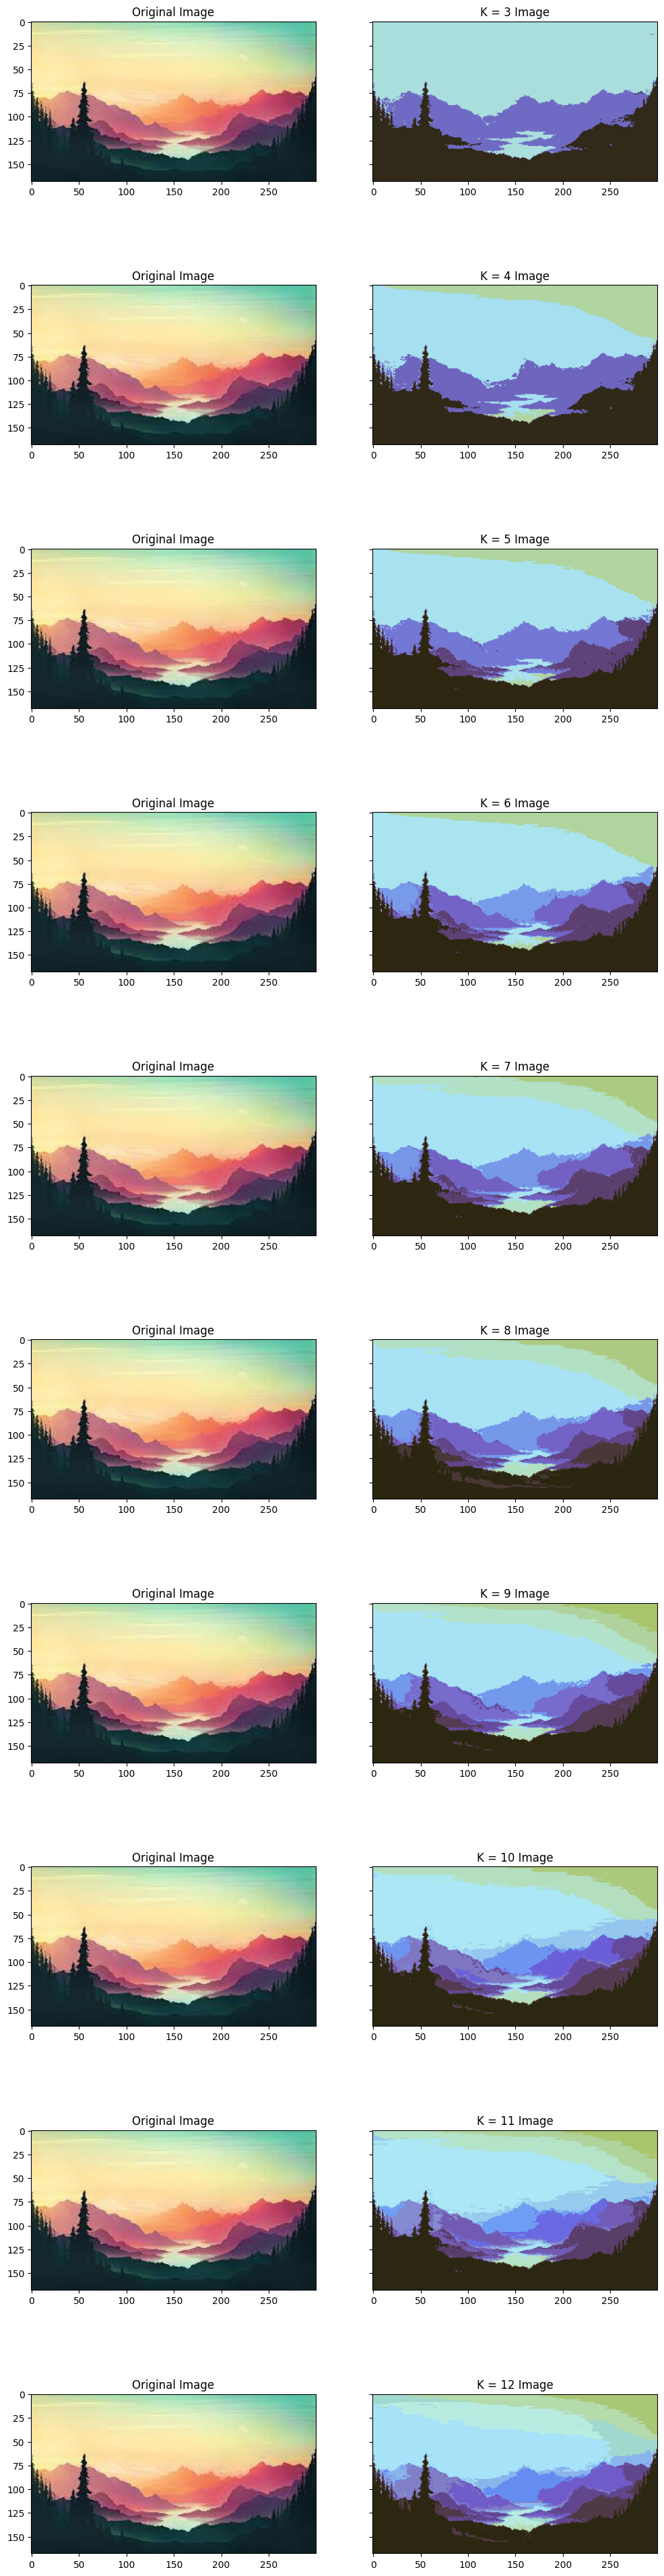

In [60]:
# imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 50)

# load image
img = cv.imread('/content/scenery.jfif')
Z = img.reshape((-1, 3))
# convert to np.float32
Z = np.float32(Z)

# define stopping criteria, number of clusters(K) and apply kmeans()
# TERM_CRITERIA_EPS : stop when the epsilon value is reached
# TERM_CRITERIA_MAX_ITER:  stop when Max iteration is reached
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

fig, ax = plt.subplots(10, 2, sharey=True)
for i in range(10):
    K = i + 3
    # apply K-means algorithm
    ret, label, center = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make the original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape(img.shape)
    # plot the original image and K-means image
    ax[i, 1].imshow(res2)
    ax[i, 1].set_title('K = %s Image' % K)
    ax[i, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax[i, 0].set_title('Original Image')

plt.show()
